The goal of this section is to perform some simple visualizations to gain a basic understanding of the dataset.

### Load R Packages

In [3]:
require(glmnet)
require(glmulti)
require(DAAG)
require(arm)

### Load csv file

In [4]:
data = read.csv("../data/data.csv", header = TRUE, sep = ",")

In [5]:
data

LED,OLED,QLED,UHD,ULED,X4K,brand,current_price,description,id,inch,name,old_price
1,0,0,0,0,0,HAI,749,Energy saving and Eco-friendly with auto control LED light outputFull High-Definition 1080p resolutionUSB Media availableHDMI Media available,HAI-LE32K6000T,32,Haier 32-Inch Full HD LED TV Model LE32K6000T,889
1,0,0,1,0,1,HAI,1885,Smart Share function which connects with smartphone and padAndroid Operating System and Wi-Fi connectivitySmart Cursor Remote Mouse PointerUltra High-Definition in 4K Crystal Clear Image,HAI-LE50U6600U,50,Haier 50-inch 4K Ultra HD Smart LED TV LE50U6600U,2829
1,0,0,0,0,0,HSE,1599,Hisense new VIDAA U Smart Tv Operating SystemOne Touch Access and USB Media with Divx DecoderOpera Web Browser and App Store Dolby Digital crisp and clear audioLED Matrix,HSE-49A5700PW,49,Hisense 49-Inch HD LED Smart TV Model 49A5700PW,1899
1,0,0,0,0,0,HSE,1499,49 inch narrow frame Display3 HDMI and 1 USB Ports1920 x 1080 ResolutionEnriched Visuals and AudioEnchanced Color ImagingDolby digital plusDvbT2 freeview,HSE-49N2173P,49,Hisense 49-inch LED TV HSE-49N2173P,1829
0,0,0,1,0,1,HSE,2399,Hisense new VIDAA Smart Tv Operating SystemSmartphone as remote control using RemoteAppHDR Tech for Ultra HD 4K Experience movies or gamingMEMC tech for smooth motion to see clearly fast moving object,HSE-55A6100UW,55,Hisense 55-inch 4K Ultra HD Smart TV Model 55A6100UW,2699
0,0,0,1,0,0,HSE,2599,65-Inch Ultra HD 3840×2160 HDR Technology Remote App,HSE-55A6501UW,55,Hisense 55-Inch UHD TV A6501,2999
0,0,0,1,0,0,HSE,3899,65-Inch Ultra HD 3840×2160 HDR Technology Remote App,HSE-65A6501UW,65,Hisense 65-Inch UHD TV A6501,4999
0,0,0,1,0,0,LG,1799,High-Resolution for a razor sharp imageConsistent images at any angleThe core of authentic image4K Active HDR for a lifelike sceneLG TV meets AIMulti-channel bringing encapsulating sound effect,LG-43UK6300,43,LG 43UK6300PTE 43-inch UK63 Series UHD HDR Smart TV LG-43UK6300,2357
0,0,0,1,0,0,LG,1999,49-inchMulti-channelHigh-Resolution4K Active HDR,LG-49UK6320,49,LG 49-inch UHD TV LG-49UK6320,3017
0,0,0,1,0,0,LG,3499,"Rich, accurate color and deeper blackSpectacular colors by Nano Cell™ DisplayRevealing the truth about colors in TVThe New Brain ?7 Intelligent ProcessorCinema HDR, delivering the filmmaker's visionLG SUPER UHD TV meets AI",LG-49SK8000,49,LG 49SK8000PTA 49-inch SK80 Series Super UHD HDR Smart TV LG-49SK8000,4299


### Cast features to categorical/numeric

In [6]:
desired_cols = c('current_price', 'inch', 'old_price', 'brand','X4K', 'LED', 'OLED', 'QLED', 'UHD', 'ULED')
dataset = data[desired_cols] 

In [7]:
dataset$brand = as.factor(dataset$brand)
dataset$X4K = as.factor(dataset$X4K)
dataset$LED = as.factor(dataset$LED)
dataset$OLED = as.factor(dataset$OLED)
dataset$QLED = as.factor(dataset$QLED)
dataset$UHD = as.factor(dataset$UHD)
dataset$ULED = as.factor(dataset$ULED)

dataset$old_price = as.numeric(dataset$old_price)
dataset$current_price = as.numeric(dataset$current_price)
dataset$inch = as.numeric(dataset$inch)

In [8]:
dataset

current_price,inch,old_price,brand,X4K,LED,OLED,QLED,UHD,ULED
749,32,889,HAI,0,1,0,0,0,0
1885,50,2829,HAI,1,1,0,0,1,0
1599,49,1899,HSE,0,1,0,0,0,0
1499,49,1829,HSE,0,1,0,0,0,0
2399,55,2699,HSE,1,0,0,0,1,0
2599,55,2999,HSE,0,0,0,0,1,0
3899,65,4999,HSE,0,0,0,0,1,0
1799,43,2357,LG,0,0,0,0,1,0
1999,49,3017,LG,0,0,0,0,1,0
3499,49,4299,LG,0,0,0,0,1,0


### Scatter Matrix

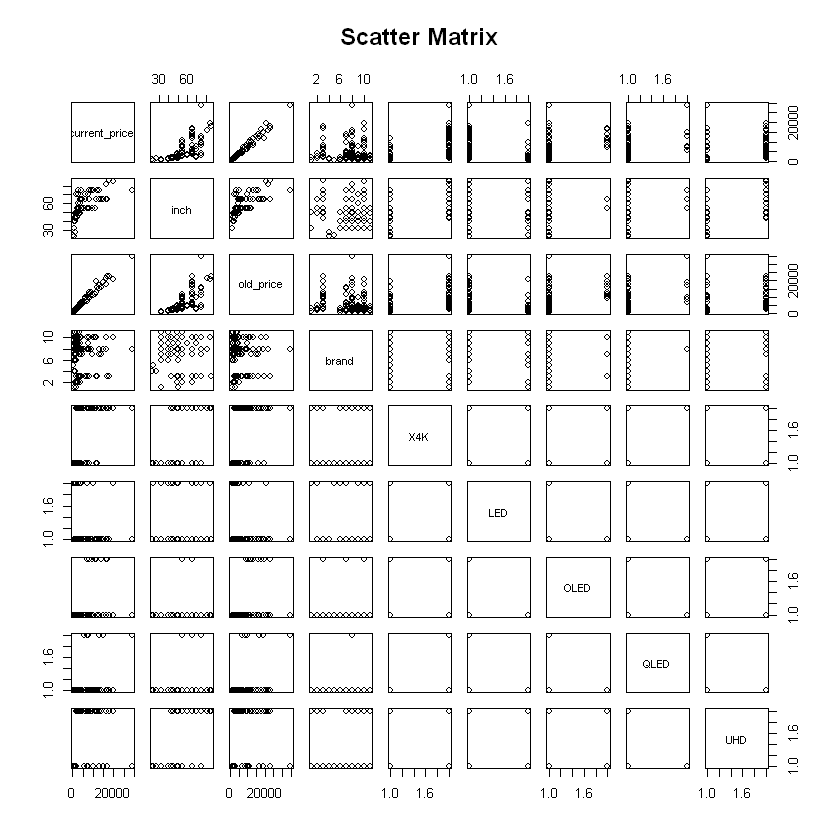

In [17]:
pairs(dataset[1:9], main='Scatter Matrix')

**Finding 1:**
- *current_price* and *old_price* are strongly correlated. This is not surprising because they are prices of the same TV.

**Finding 2:**
- Significant correlation between *current_price* and *inch*. This makes sense because a larger TV should be more expensive, most of the time.

### Correlation matrix (for numeric variables)

The following correlation matrix further reinforced the findings above.

In [164]:
print(cor(dataset[c(1:3)], use = "complete.obs"))

              current_price      inch old_price
current_price     1.0000000 0.7090275 0.9870066
inch              0.7090275 1.0000000 0.7215350
old_price         0.9870066 0.7215350 1.0000000


### Distribution of TV prices 

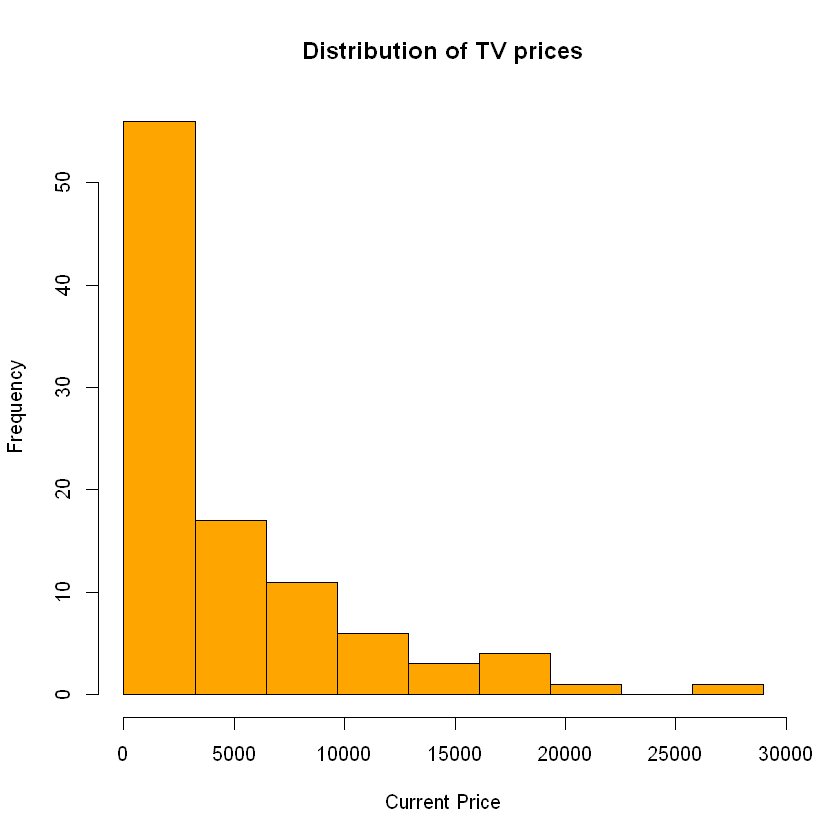

In [15]:
hist(dataset$current_price, 
     breaks=seq(0,max(dataset$current_price),l=10), 
     main="Distribution of TV prices",
     xlab="Current Price",
     col="orange")

**Finding 3:**
- In general, we see a high supply of cheaper TVs (those below RM 5000), and a lower supply of expensive TVs. This is likely due to higher demand of cheaper TVs from the middle class consumers.

### Prices of TVs of different brands

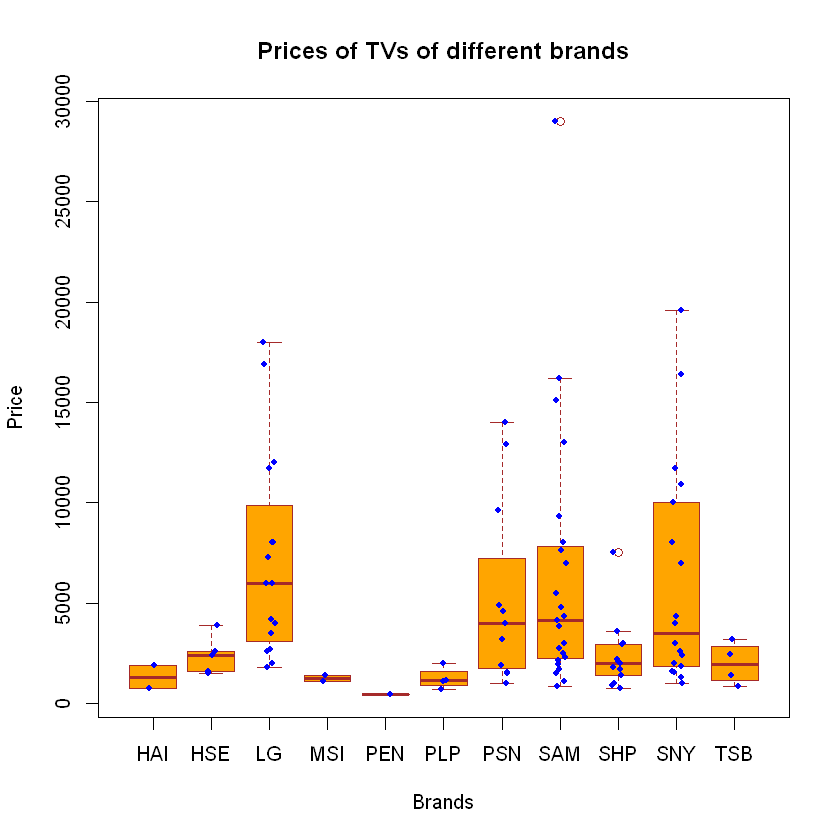

In [16]:
boxplot(current_price~brand,
        data=dataset,
        main="Prices of TVs of different brands",
        xlab="Brands",
        ylab="Price",
        col="orange",
        border="brown"
       )
stripchart(current_price ~ brand, vertical = TRUE, data = dataset, 
           method = "jitter", add = TRUE, pch = 20, col = 'blue'
          )

**Finding 4:**
- We notice that **LG**, **PSN (Panasonic)**, **SAM (SAMSUNG)**, **SNY (SONY)** offer a wide range of products in terms of price, while the other brands (**HAI**, **HSE**, **MSI**, **PEN**, **PLP**, **SHP**, **TSB**) seem to only focus on promoting cheaper products.
- One possible explanation could be that **LG**, **PSN**, **SAM**, **SNY** are the larger TV manufacturers (in terms of market share). 

### Prices of TVs of different sizes (in inch)

This further reinforces **Finding 2**.

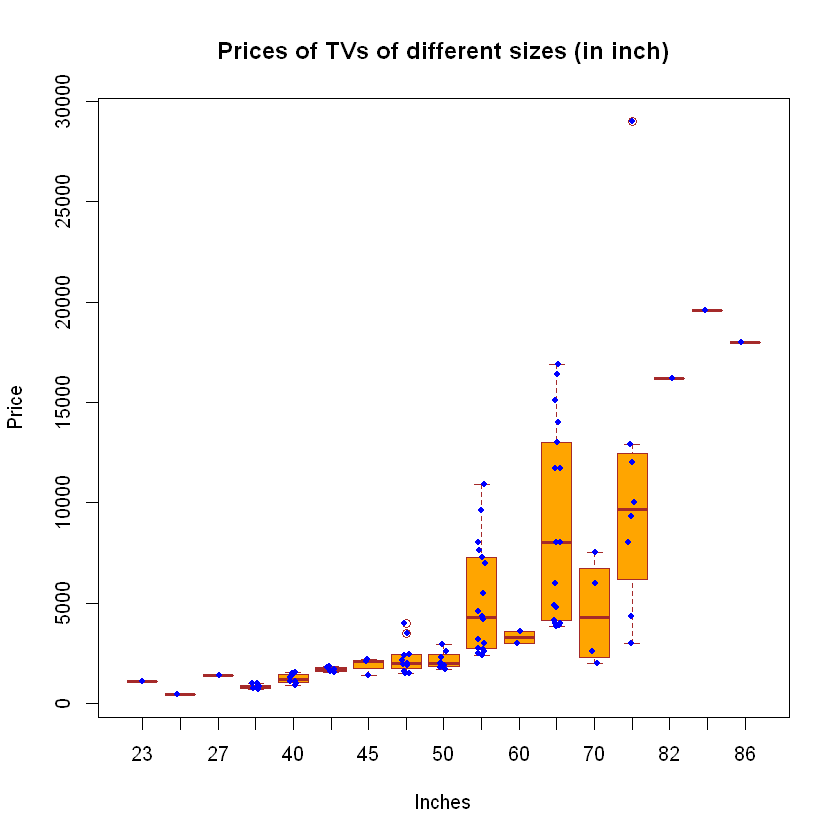

In [9]:
boxplot(current_price~inch,
        data=dataset,
        main="Prices of TVs of different sizes (in inch)",
        xlab="Inches",
        ylab="Price",
        col="orange",
        border="brown"
       )
stripchart(current_price ~ inch, vertical = TRUE, data = dataset, 
           method = "jitter", add = TRUE, pch = 20, col = 'blue'
          )

### Percentage of discount for each brand

By comparing the **current_price** and **old_price**, we can work out how much each item is being discounted at the moment.

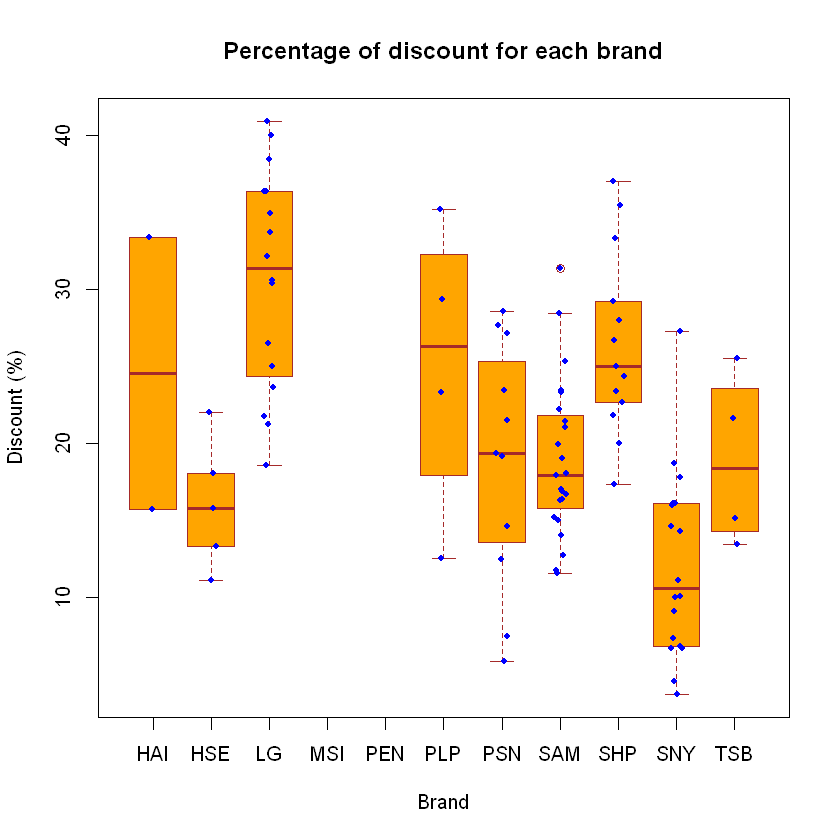

In [30]:
boxplot((1 - current_price / old_price) * 100 ~ brand,
        data=dataset,
        main="Percentage of discount for each brand",
        xlab="Brand",
        ylab="Discount (%)",
        col="orange",
        border="brown"
       )
stripchart((1 - current_price / old_price) * 100 ~ brand, vertical = TRUE, data = dataset, 
           method = "jitter", add = TRUE, pch = 20, col = 'blue'
          )

**Finding 5:**
- We notice that **LG** TVs have the highest discount rates at the moment. 
- This could mean that Senheng is currently promoting **LG** products more heavily than others. 